# Laplace Equation

This example will use successive approximation to caluclate the temperatures in a plane, given boundary 
conditions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the dimensions
lenX = 20
lenY = 20 
# Set maximum iteration
maxIter = 500
# Set accuracy goal.  We'll stop iterating when the changes are less than this.
acc = .001

In [4]:
# Boundary condition
Ttop = 100
Tbottom = 0
Tleft = 30
Tright = 10

# Initial guess of interior grid. Pick somethin in the middle
Tguess = 50

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.jet #you can try: colourMap = plt.cm.coolwarm

# Create a grid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))


In [5]:
# Set array size and set the interior value with Tguess.
# Note, array definitions of X and Y are different than plot definitions!
# First index is Y, second index is X

T = np.empty((lenY, lenX))
# I'm going make a routine to initialize the array so I don't have to keep coming back here.

def init_grid():
    # Fill with the guess
    T.fill(Tguess)
    # Set Boundary condition. 
    # Top row
    T[(lenY-1), :] = Ttop
    # Bottom row
    T[0, :] = Tbottom
    # Right column
    T[:, (lenX-1)] = Tright
    # Left column
    T[:, 0] = Tleft
    
init_grid()

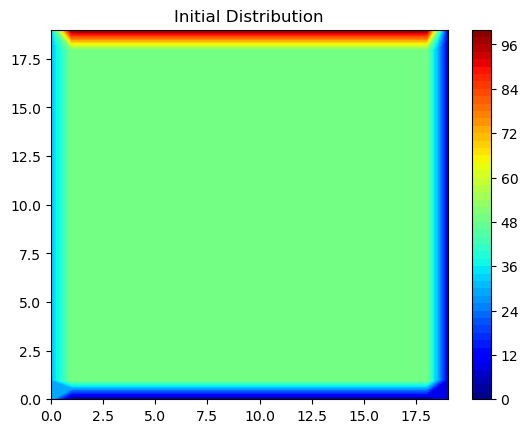

In [6]:
# Plot the initial distribution

plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.title(f"Initial Distribution")
plt.colorbar()

plt.show()

Starting to iterate...
Converged to within 0.001 degrees after 232 iterations.


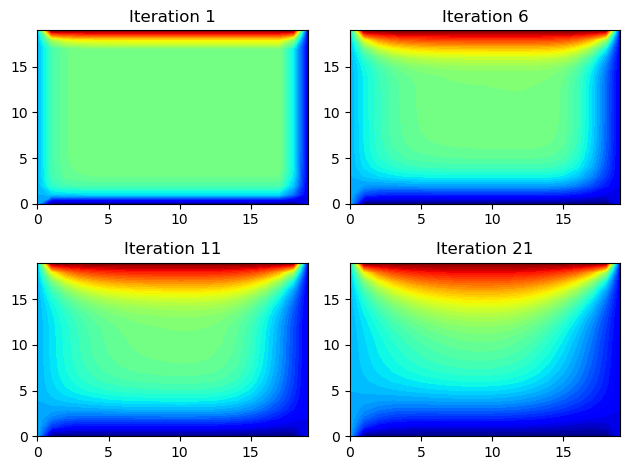

In [7]:
# Initialize the grid
init_grid()
# Track maximum deviation as a function of iteration
max_dT = np.empty(maxIter)
# Create subplots to track progress

fig,ax = plt.subplots(2,2)
# Places to plot subplots
breaks = [0,5,10,20]

print("Starting to iterate...")

for it in range(0, maxIter):
    max_dT[it] = 0.  # Look for the maximum change
    # iterate over all the interior points
    for i in range(1, lenY-1):
        for j in range(1, lenX-1):
            # Save the original temperature
            Told = T[i,j]
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
            dT = abs(T[i,j]-Told)   # change
            if dT>max_dT[it]:       # find the largest
                max_dT[it] = dT
    # If I'm at one of the breakpoints, make a plot
    if it in breaks:
        i = breaks.index(it)
        p_row = i//2   # row of plot
        p_col = i%2    # column of plot
        p = ax[p_row,p_col]   # pointer to subplot
        # Make the plot
        p.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
        p.set_title(f"Iteration {it+1}")

    # Is it good enough?
    if max_dT[it] <= acc:
        break
            
if it == (maxIter-1):
    print(f"{maxIter} interations reached without converging.")
else:
    print(f"Converged to within {acc} degrees after {it+1} iterations.")

# Show the plots
plt.tight_layout()  # This fixes overlaps
plt.show()

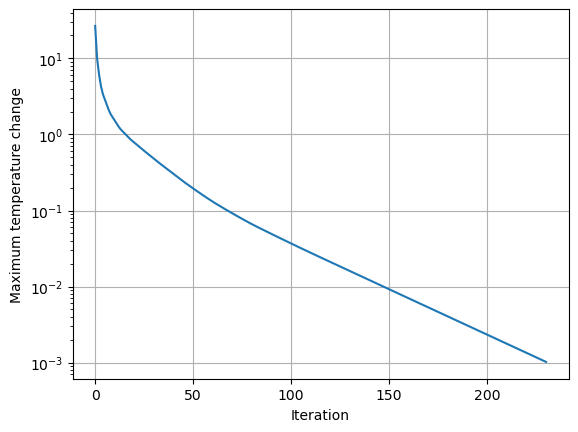

In [8]:
# Examine the convergence
plt.plot(range(it),max_dT[:it])
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Maximum temperature change')
plt.grid()
plt.show()
            

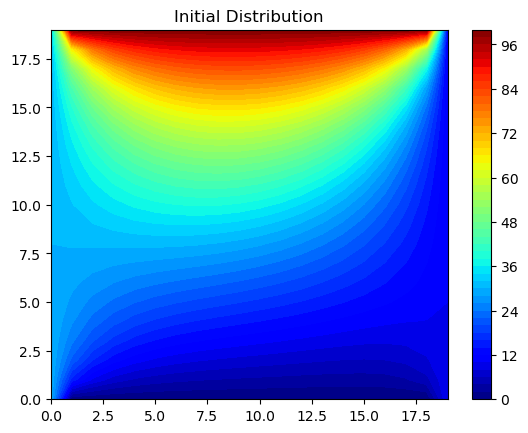

In [9]:
# Final Distribution

plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)
plt.title(f"Initial Distribution")
plt.colorbar()

plt.show()